In [1]:
import pandas as pd

# 주어진 데이터
data = {
    'Height': [150, 160, 170, 175, 165],
    'Weight': [42, 50, 70, 64, 56]
}
df = pd.DataFrame(data)

# 상관계수 계산
correlation = df.corr()

print(correlation)


          Height    Weight
Height  1.000000  0.919509
Weight  0.919509  1.000000


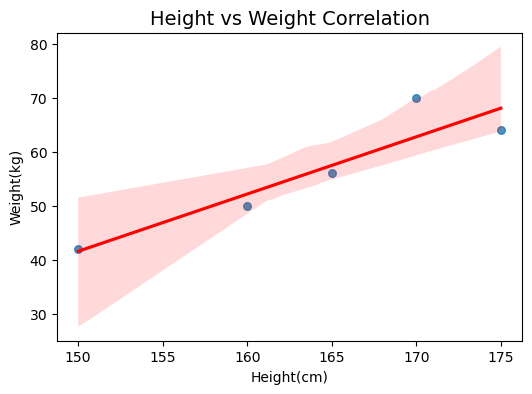

In [2]:
# ------------------------------------------------------
# 시각화
# ------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프 크기 설정 (가로 6인치, 세로 4인치)
plt.figure(figsize=(6, 4))

# 산점도 + 회귀선 그리기
# scatter_kws={'s':30} → 점 크기 설정
# line_kws={'color':'red'} → 회귀선 색상 빨강으로 설정
sns.regplot(x='Height', y='Weight', data=df, scatter_kws={'s':30}, line_kws={'color':'red'})

# 그래프 제목 추가
plt.title("Height vs Weight Correlation", fontsize=14)

# x축 라벨 지정
plt.xlabel("Height(cm)")

# y축 라벨 지정
plt.ylabel("Weight(kg)")

# 그래프 출력
plt.show()



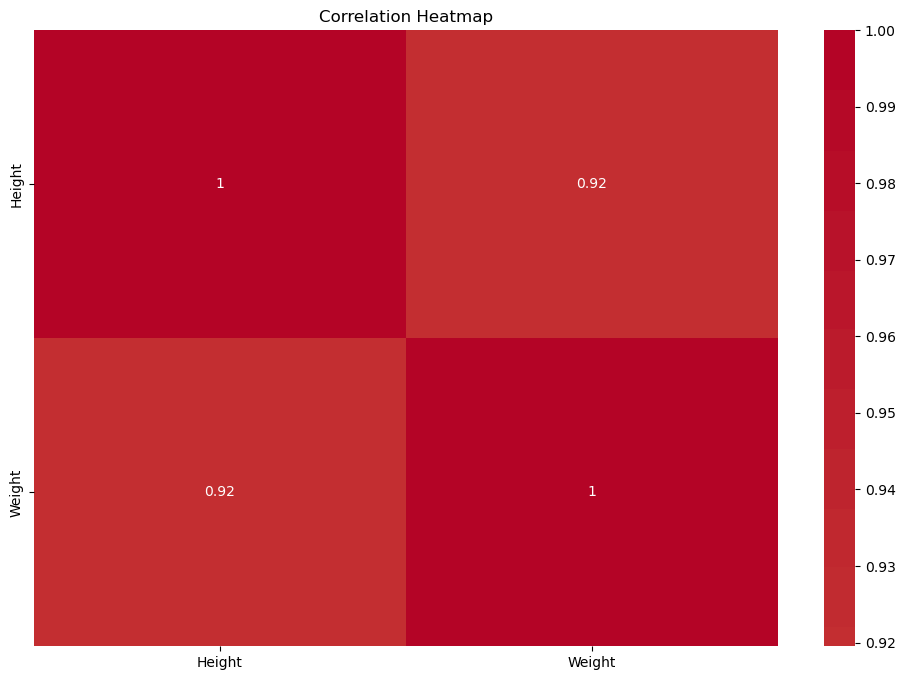

In [3]:
# 히트맵 시각화
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


In [6]:

print(correlation.iloc[0,1])

print(df['Height'].corr(df['Weight']))
print(df['Weight'].corr(df['Height']))


0.9195090879163764
0.9195090879163765
0.9195090879163765


In [7]:
# ------------------------------------------------------
# 상관계수 종류
# ------------------------------------------------------
# 피어슨 상관계수 (Pearson Correlation) - 기본값
# 연속형 변수 간 '선형 관계(직선적 관계)'를 측정
# 값의 범위: -1 ~ +1 (1에 가까울수록 강한 양의 상관, -1은 강한 음의 상관)
print(df.corr())

# 스피어맨 상관계수 (Spearman Rank Correlation)
# 순위(랭크)에 기반한 상관계수 → 비선형 관계에도 적용 가능(비선형 예시 : 시험 공부 시간(x)이 늘어날수록 점수(y)도 대체로 증가 (처음엔 가파르게 오르다가 점점 덜 오를 수도 있음 → 비선형).
# 데이터가 정규분포를 따르지 않거나 순서형 변수(Ordinal)일 때 유용
print(df.corr(method='spearman'))

# 켄달 타우 상관계수 (Kendall's Tau Correlation)
# 두 변수의 순위 일치 정도를 비교 (쌍 비교 방식)
# 데이터 개수가 적을 때 안정적이고 이상치(Outlier)에 덜 민감
print(df.corr(method='kendall'))


          Height    Weight
Height  1.000000  0.919509
Weight  0.919509  1.000000
        Height  Weight
Height     1.0     0.9
Weight     0.9     1.0
        Height  Weight
Height     1.0     0.8
Weight     0.8     1.0


In [8]:
from scipy import stats
# 피어슨 상관계수와 p-value 계산
print(stats.pearsonr(df['Weight'], df['Height']))

# 스피어맨 상관계수와 p-value 계산
print(stats.spearmanr(df['Weight'], df['Height']))

# 켄달타우 상관계수와 p-value 계산
print(stats.kendalltau(df['Weight'], df['Height']))


PearsonRResult(statistic=0.9195090879163766, pvalue=0.027079456895589476)
SignificanceResult(statistic=0.8999999999999998, pvalue=0.03738607346849874)
SignificanceResult(statistic=0.7999999999999999, pvalue=0.08333333333333333)


In [10]:
from scipy.stats import chi2_contingency
import pandas as pd

# 데이터 예시 (성별에 따라 제품 선택에 차이가 있도록 설정)
df = pd.DataFrame({
    'gender': ['M','M','M','M','M','F','F','F','F','F'],
    'product': ['A','A','A','B','B','B','B','B','A','A']
})
df

,gender,product
0,M,A
1,M,A
2,M,A
3,M,B
4,M,B
5,F,B
6,F,B
7,F,B
8,F,A
9,F,A


In [11]:
# 교차표 생성
crosstab = pd.crosstab(df['gender'], df['product'])
crosstab


product,A,B
gender,,
F,2,3
M,3,2


In [13]:
# # 카이제곱 검정
chi2, pval, dof, expected = chi2_contingency(crosstab)
print('Chi-square: ',chi2)
print('p-value: ',pval)
print('자유도: ', dof)
print('기대빈도: ',expected)


Chi-square:  0.0
p-value:  1.0
자유도:  1
기대빈도:  [[2.5 2.5]
 [2.5 2.5]]


In [14]:
# # 결과 해석
alpha = 0.05
if pval < alpha:
    print('→ 두 변수는 유의한 관계가 있습니다.')
else:
    print('→ 두 변수는 독립적입니다.')


→ 두 변수는 독립적입니다.


In [ ]:
#===================================

In [16]:
import pandas as pd
# 1. csv파일 불러오기
df= pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29304 entries, 0 to 29303
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              29304 non-null  int64  
 1   age             29292 non-null  float64
 2   workclass       27642 non-null  object 
 3   fnlwgt          29304 non-null  int64  
 4   education       29304 non-null  object 
 5   education.num   29304 non-null  int64  
 6   marital.status  29304 non-null  object 
 7   occupation      27636 non-null  object 
 8   relationship    29304 non-null  object 
 9   race            29304 non-null  object 
 10  sex             29304 non-null  object 
 11  capital.gain    29304 non-null  int64  
 12  capital.loss    29304 non-null  int64  
 13  hours.per.week  29291 non-null  float64
 14  native.country  28767 non-null  object 
 15  income          29304 non-null  object 
dtypes: float64(2), int64(5), object(9)
memory usage: 3.6+ MB


In [20]:
import pandas as pd
# 2. target 분리
#target = df.pop('income')


# 3 범주형 x 분리
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

# 4. 카이제곱 검정 수행 및 결과 저장
results = []

for col in categorical_cols:
    crosstab = pd.crosstab(df[col], target)
    chi2, p, dof, expected = chi2_contingency(crosstab)
    results.append({
        '변수명': col,
        'Chi2 통계량': round(chi2, 4),
        'p-value':round(p, 4),
        '자유도': dof,
        '유의성(p<0.05)': '유의함' if p < 0.05 else '유의하지 않음'
    })

# 6. DataFrame 생성 및 정렬
chi2_df = pd.DataFrame(results).sort_values('p-value', ascending=True).reset_index(drop=True)

# 7. 결과 출력
print("=== 카이제곱 검정 결과 (income 종속변수 기준) ===")
display(chi2_df)

=== 카이제곱 검정 결과 (income 종속변수 기준) ===


,변수명,Chi2 통계량,p-value,자유도,유의성(p<0.05)
0,workclass,733.5968,0.0,7,유의함
1,education,3949.6069,0.0,15,유의함
2,marital.status,5939.7594,0.0,6,유의함
3,occupation,3360.2003,0.0,13,유의함
4,relationship,6099.7599,0.0,5,유의함
5,race,298.2598,0.0,4,유의함
6,sex,1362.7943,0.0,1,유의함
7,native.country,284.2286,0.0,40,유의함
